<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/Demokratie%20und%20V-Dem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demokratien analysieren mit V-DEM**

## **Setup**

Zu Beginn laden wir uns wieder die Pakete, die wir benötigen. Hier brauchen wir zunächst das *tidyverse* und *vdemdata*, um den Datensatz für heute zu laden.

In [38]:
library(tidyverse)
library(devtools)
install_github("vdeminstitute/vdemdata")
library(vdemdata)

Skipping install of 'vdemdata' from a github remote, the SHA1 (3030ccf0) has not changed since last install.
  Use `force = TRUE` to force installation



## **Der V-DEM Datensatz**

“Varieties of Democracy”, kurz V-Dem ist das aktuell umfangreichste Forschungsprojekt, das die Demokratiequalität aller Länder erfasst. Im Gegensatz zu Freedom House oder Polity IV trifft V-Dem nicht nur allgemeine Aussagen über den Zustand demokratischer Institutionen und Freiheiten, sondern liefert sehr viele konkrete Variablen, die einen nuancierten Blick ermöglichen. So gibt V-Dem z. B. auch Aufschluss über die Wissenschaftsfreiheit oder Zensur im Internet. Für uns besonders interessant ist die Verbindung von politischen Variablen mit ökonomischen, geographischen und soziologischen Variablen. So lassen sich bekannte Theorien zur Demokratisierung untersuchen. Die Zeitreihe des Projekts ist ebenfalls beachtlich. Der Kern der Daten beginnt, wie so oft, nach dem zweiten Weltkrieg, doch die Forscherinnen und Forscher der Univeristät Göteborg haben für einige Länder den Grad der Demokratiserung bis 1789 ermittelt – da hatten wir uns auf dem heutigen Territorium Deutschlands gerade langsam vom Absolutismus verabschiedet.

Besonders bei solch großen Datensätzen ist das Codebuch ein wichtiger Begleiter, um alle Variablen identifizieren zu können und einen Überblick über den Datensatz zu bekommen. Das Codebuch des Datensatzes finden sie hier:
https://www.v-dem.net/documents/24/codebook_v13.pdf

V-Dem bietet verschiedene Versionen des Datensatzes an. Wir nuntzen hier die *Core* Variante, welche die wichtgsten Variablen enthält.

Der Datensatz ist hhhuuuuge und er hat auch the best data. Schauen wir mal wieviele Zeilen und Variablen der Datensatz hat. Also seine Dimensionen:

In [39]:
dim(vdem)

[1] 27555  4603

Die erste Zahl steht für die Anzahl an Beobachtungen im Datensatz. Die zweite Zahl hingegen steht für die Anzahl an Variablen. Wir sehen sofort, dass dieser Datensatz (und das ist nur die *Core* Variante) sehr viel zu bieten hat!

Schauen wir uns an wie der Datensatz aufgebaut ist (dazu wählen wir uns die ersten zehn Zeilen aus):

In [40]:
vdem %>%
    filter(row_number() < 10)  %>%
    View()

country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,⋯,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts,elecfair
<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1794,1794-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1795,1795-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1796,1796-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA
Mexico,MEX,3,1797,1797-12-31,1,1,Viceroyalty of New Spain,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,NA


Werfen wir noch einen Blick auf Deutschland, indem wir den Datensatz in der Variable *country_name* filtern.

In [41]:
vdem %>%
    filter(country_name == "Germany")  %>%
    View()

country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,⋯,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts,elecfair
<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,DEU,77,1789,1789-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,1.981
Germany,DEU,77,1790,1790-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,1.981
Germany,DEU,77,1791,1791-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,0,0,NA,NA,1.981
Germany,DEU,77,1792,1792-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981
Germany,DEU,77,1793,1793-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981
Germany,DEU,77,1794,1794-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981
Germany,DEU,77,1795,1795-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981
Germany,DEU,77,1796,1796-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981
Germany,DEU,77,1797,1797-12-31,1,1,Kingdom of Prussia,1789,2022,⋯,NA,NA,NA,NA,NA,1,0,NA,NA,1.981


Wir sehen, dass er nach Länderjahren aufgebaut ist, also jede Zeile beinhaltet Informationen (in den Spalten) über ein Land in einem bestimmten Jahr.


## **Zeitliche Entwicklung von Demokratien**

Die Demokratieforschung fragt u.a., wie sich die Demokratie verbreitet und wo es zu Rückfällen in autokratische Systeme kommt. Machen wir uns doch selbst ein Bild über die Entwicklung von Demokratien über Zeit. Die Variable *v2x_regime* trifft darüber eine Aussage und unterteilt alle Länderjahre in closed autocracies, electoral autocracies, electoral democracies und liberal democracies.

Schauen wir uns die zeitliche Entwicklung mal graphisch an. Dazu müssen wir die Daten allerdings erst ein wenig bearbeiten – data wrangling mit dem tidyverse. Die einzelnen Befehle fügen wir wieder mit der pipe, *%>%*, zusammen. Für die Visualisierung nutzen wir das uns schon bekannte *ggplot* (Achtung: im Grafikbefehl werden die Elemente mit “+” aneinandergefügt):

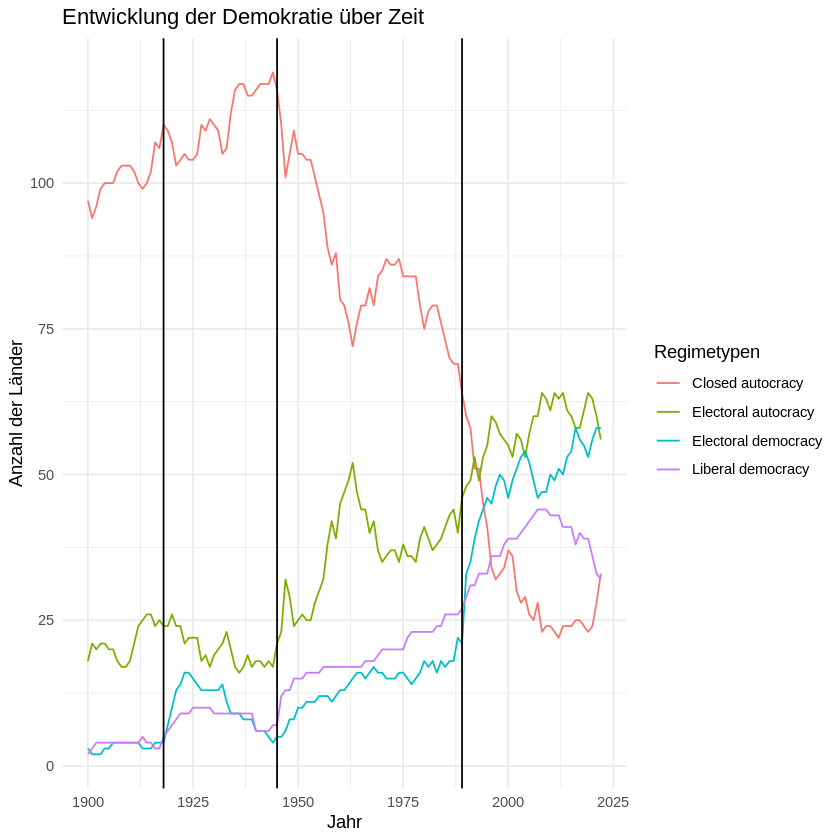

In [42]:
vdem %>%
  # Lösche alle Zeilen mit missings
  drop_na(v2x_regime) %>%
  # Gruppiere nach Jahr
  group_by(year) %>%
  # Zähle für jedes Jahr die Häufigkeit der einzelnen Regime-Types
  count(v2x_regime) %>%
  # Schiebe die Daten in ein ggplot
  ggplot(
    # Schreibe die Jahre auf die x-Achse, die Häufigkeiten der regime-types auf die y-Achse
    aes(x = year, y = n,
        # färbe die Linien nach den unterschiedlichen Regime-Types
        color = factor(v2x_regime, levels = c(0, 1, 2, 3),
                       labels = c("Closed autocracy", "Electoral autocracy", "Electoral democracy",
                                  "Liberal democracy")), na.rm = TRUE))+
  # Stelle die Daten als Linie dar
  geom_line() +
  # Füge eine vertikale Referenzlinie für das Ende der Weltkriege und
  # die Demokratisierung des Ostblocks ein
  geom_vline(xintercept = c(1918, 1945, 1989)) +
  # Beschrifte die Abbildung und die Achsen
  labs(title = "Entwicklung der Demokratie über Zeit",
       x = "Jahr", y = "Anzahl der Länder") +
  # Definiere die Legende
  guides(color=guide_legend("Regimetypen"))+
  # wähle das theme_minimal, damit Dich Deine R-buddies nicht mehr dissen, weil Du noch das
  # Standardtheme verwendest.
  theme_minimal()

Sehr schick und aussagekräftig! Spielen Sie mal ausführlich mit diesem Befehl herum, um die einzelnen Teile besser zu verstehen. Am besten geht das, wenn man die Zeilen nacheinander ausführt. Das ist hier etwas umständlicher. Sie müssen nach und nach die Zeilen eingeben und dann ausführen.

In [43]:
vdem %>%
  # Lösche alle Zeilen mit missings
  drop_na(v2x_regime)

country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,⋯,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts,elecfair
<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mexico,MEX,3,1900,1900-12-31,2,1,United Mexican States,1789,2022,⋯,476,27.6,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1901,1901-12-31,2,1,United Mexican States,1789,2022,⋯,489,26.7,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1902,1902-12-31,2,1,United Mexican States,1789,2022,⋯,464,28.4,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1903,1903-12-31,2,1,United Mexican States,1789,2022,⋯,459,28.7,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1904,1904-12-31,2,1,United Mexican States,1789,2022,⋯,453,29.1,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1905,1905-12-31,2,1,United Mexican States,1789,2022,⋯,485,26.9,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1906,1906-12-31,2,1,United Mexican States,1789,2022,⋯,468,27.9,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1907,1907-12-31,2,1,United Mexican States,1789,2022,⋯,466,28.0,NA,NA,0,0,0,NA,NA,-0.211
Mexico,MEX,3,1908,1908-12-31,2,1,United Mexican States,1789,2022,⋯,455,28.8,NA,NA,0,0,0,NA,NA,-0.211


Im Datensatz sind die Regiemtypen für jedes Land und Jahr als kategoriale Variable (0 bis 3) aufgeführt. Um diese kumulierte Darstellung zu erreichen, müssen Sie zunächst die Summe der Regimetypen pro Jahr berechnen und dann differenziert nach Regiemtyp darstellen. Dies geschieht im Befehl in zwei Schritten. Zunächst wird mit *group_by(year)* spezifiziert, dass alle folgenden Befehle nach Jahren getrennt durchgeführt werden sollen. Sie wollen ja nicht die globale Summe berechnen, sondern für jedes Jahr. Mit *count(v2x_regime)* folgt ein Befehl ähnlich wie *mutate()*. *count()* erstellt eine Variable n, die die Summe der Ausprägungen darstellt. Dies hatten wir auch schon bei der Auswertung der Kursumfrage genutzt. Werfen wir einen genauen Blick auf den Befehl und sein Ergebnis:

In [44]:
vdem %>%
  drop_na(v2x_regime) %>%
  group_by(year) %>%
  count(v2x_regime)

year,v2x_regime,n
<dbl>,<dbl>,<int>
1900,0,97
1900,1,18
1900,2,3
1900,3,2
1901,0,94
1901,1,21
1901,2,2
1901,3,3
1902,0,96


Sie sehen übersichtlich die neue Datenstruktur aus der dann der Graph erstellt wird. Im Graphikbefehl wird dann mit der Option *color = factor(v2x_regime, ...)* zusätzlich festgelegt, dass farblich nach dem Wert der Variable *v2x_regime*, also dem Regimtyp, differenziert werden soll.

Mit diesen Befehlen haben wir nun die Entwicklung und Verteilung verschiedener Regimetypen nach dem V-Dem Datensatz visualisiert. Wichtige historische Entwicklungen, wie das Ende der Weltkriege oder der Zerfall der Sowjetunion sind gut in den Daten zu erkennen (Kommentieren Sie doch mal die Zeile der geom_vline heraus, indem Sie ein “#” davorsetzen. Dann sehen Sie, dass die vertikalen Referenzlinien verschwinden). Ebenfalls sehen wir, dass seit ca. 2010 zum ersten Mal seit Jahrzehnten liberale Demokratien auf dem Rückzug sind und sich Autokratien ausbreiten.

## **Demokratie nach Dahl**

Nach einem ersten Blick auf die V-Dem Daten gehen wir weiter in die Details der einzelnen Variablen. Die Variable v2x_polyarchy beschreibt den elektoralen Demokratieindex, der das Prinzip der elektoralen Demokratie misst. Eine ideale Umsetzung würde den Wert 1 annehmen, das Gegenteil den Wert 0. Damit können Sie bereits genenauere Aussagen über den Zustand von Demokratien im Vergleich und in ihrer Entwicklung treffen. Im nächsten Schritt wollen wir die Entwicklung dieses Indizes für Deutschland (von 1949 bis 1991 nur Westdeutschland), Polen, Ungarn und Tunesien visualisieren:

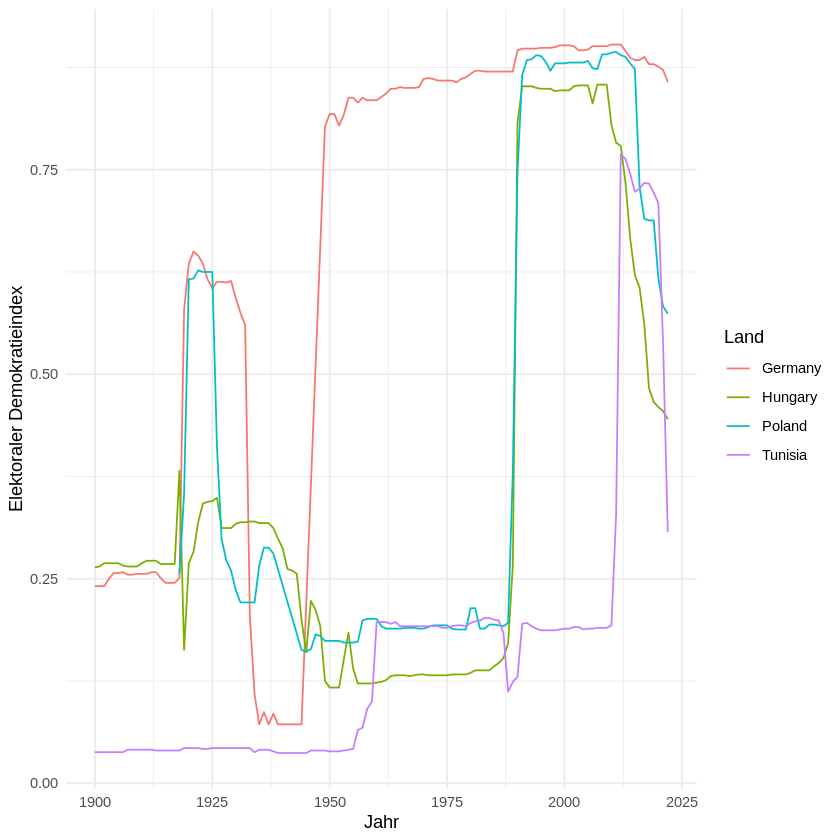

In [45]:
vdem %>%
  filter(year > 1899) %>%
  filter(country_name == "Germany" | country_name == "Poland" | country_name == "Hungary" | country_name == "Tunisia") %>%
  ggplot() +
  geom_line(mapping = aes(x= year, y=v2x_polyarchy, color = country_name)) +
  labs(x = "Jahr", y = "Elektoraler Demokratieindex", color = "Land") +
  theme_minimal()

Gut zu erkennen ist die Demokratisierung Deutschlands mit der Weimarer Republik. Sie erinnern sich, 1919 haben wir den Kaiser davon gejagt und bis heute warten [seine darbenden Nachkommen auf eine angemessene Entschädigung für das ihnen ergangene Unrecht](https://www.rnd.de/politik/historikerstreit-in-deutschland-kaiser-nachfahren-wollen-entschaedigung-trotz-ns-kollaboration-LUGQGWLLERE73EOSCARV5WE24M.html). Ab 1933 erkennen wir den Aufstieg des Nationalsozialismus (dem die Hohenzollern nach herrschender Meinung erheblich Vorschub geleistet haben). Schließlich wird die Demokratie ab 1949 wieder in Deutschland etabliert. Für Ungarn und Polen erkennen Sie die Demokratisierung nach dem Fall des Eisernen Vorhangs und den bemerkenswerten Abstieg seit 2010. In Tunesien sind u.a. die Erfolge des arabischen Frühlings erkennbar.

Aus der Vorlesung wissen Sie, dass Dahl die ideale real existierende Demokratie als Polyarchie bezeichnet. Sein Konzept beinhaltet zwei Dimensionen: Inklusion und Wettbewerb (“inclusion open to contestation”). Die Konzeption Dahls hat auch Einzug in die Methodik des V-Dem gefunden, sodass wir Werte und Indizes vorliegen haben, mit wir die Länder in Dahls Konzept verorten können.

Als Inklusionswert einer Demokratie ziehen wir die Variable *v2x_partipdem* heran (Codebuch S. 43). Dies ist der Participatory democracy index, der erhebt inwieweit das Ideal der partizipativen Demokratie erreicht wird (Maximalwert 4). Um die Wettberwerbsdimension zu ermitteln, ziehen wir die Variable *v2elfrfair*, den clean election index (Codebuch S. 48), heran. Dieser ermittelt inwieweit Wahlen fair und frei sind. Dies gilt insbesondere für den Grad des fairen Wettbewerbs unter Parteien. Da die Variable *v2elfrfair* nur in Jahren von Wahlen erhoben wird, erstellen wir zunächst die Variable elecfair und übertragen bei fehlenden Werten die Werte der letzten Wahl.

In [46]:
#Lücken in v2elfrfair zu füllen. NAs werden durch Vorjahreswerte ersetzt
vdem <- vdem %>%
  mutate(elecfair = v2elfrfair) %>%
  fill(elecfair, .direction = "down")

Danach bilden wir nun die beiden Dimensionen in einem Plot ab. Ausgewählt wurden folgende Länder:

*   Schweiz (*CHE*)
*   Deutschland (*DEU*)
*   Vereinigte Staaten (*USA*)
*   Russland (von 1919 bis 1990 Sovietunion) (*RUS*)
*   China (*CHN*)
*   Frankreich (*FRA*)

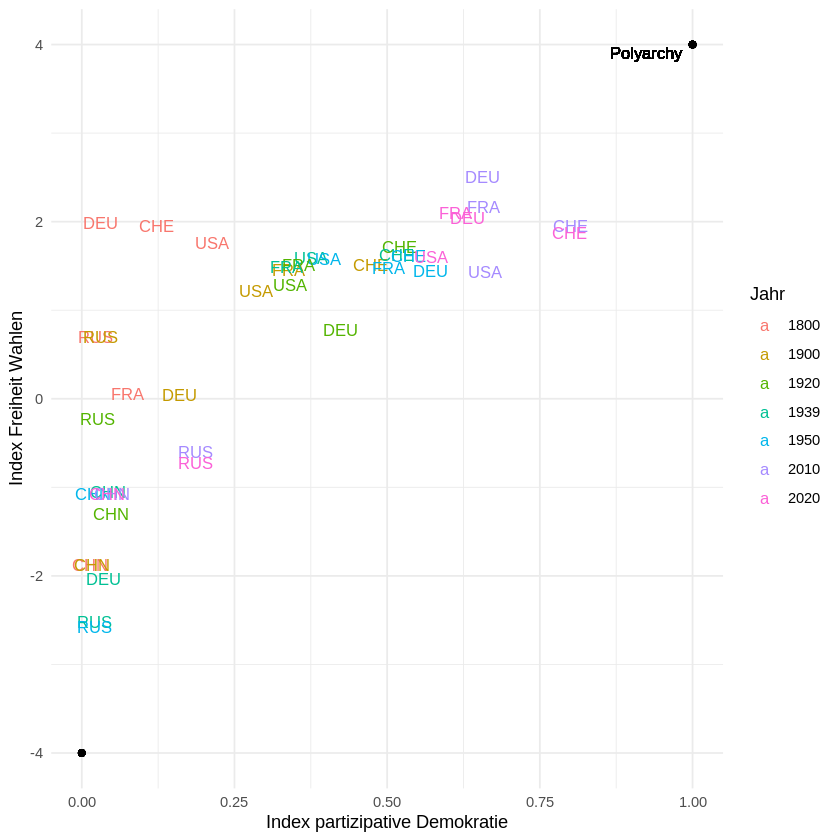

In [47]:
vdem %>%  #Graph Demokratie nach Dahl ausgewählte Länder
  filter(country_name == "Switzerland" | country_name == "Germany" | country_name == "United States of America" |
           country_name == "Russia" | country_name == "China" | country_name == "France") %>%
  filter(year == 1800 | year == 1900 | year == 1920 | year == 1939 | year == 1950 | year == 2010 | year == 2020) %>%
  ggplot() +
  geom_text(size = 3.5, aes(x=.9, y=3.9, label = "Polyarchy", hjust = 0.3)) +
  geom_point(aes(x=1, y=4)) +
  geom_point(aes(x=0, y=-4)) +
  geom_text(size = 3.5, check_overlap = FALSE, aes(x = v2x_partipdem, y = elecfair, label = country_text_id, color = factor(year))) +
  labs(x = "Index partizipative Demokratie",  y = "Index Freiheit Wahlen", color = "Jahr") +
  xlim(c(0, 1)) +
  ylim(c(-4, 4)) +
  theme_minimal()

Für diese Darstellung wurde das Geom *geom_text* verwendet. Im Gegensatz zu bisher verwendeten Geomen gibt dieses Text als Punkte aus, sodass hier sehr einfach zwischen den Staaten unterschieden werden kann. Welchen Text das Geom anzeigt kann mit der Option *label = Variable* festgelegt werden. Versuchen Sie doch einmal andere Jahre darzustellen oder andere Länder.